<a href="https://colab.research.google.com/github/varunkr24/Machine-Learning/blob/Python/Classify_Abnormal_BP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Background -**  
Hypertension with aging is a major medical concern even in this ultramodern era of advanced therapies. Preliminary
testing is a key element in analyzing the procedures of mild abnormality of blood pressure for a substantial period of 
time, but presently has a limited value in the prediction of progression to hypertension. Although hypotension, low 
blood pressure in common parlance, is less common among the ones with abnormal blood pressure, but the adverse 
effect it has on their health is equivalent to that of hypertension.
Although recent studies have hypothesized that, keeping other factors constant, hemoglobin level is positively 
associated with blood pressure in a large cohort of healthy individuals, but genetic causes are also prominent in some of 
individuals. However, there are numerous other factors which determine whether an individual is likely to develop this 
abnormality.
Data scientists lay out the hypothesis that newer statistical classification methods derived from data mining and 
machine learning methods are capable of reducing the prediction error manifolds and help cardiologists to conduct a 
two-tailed preliminary prediction of abnormality of blood pressure in an individual.


**Objective -**
Employing statistical techniques, conduct a preliminary prognosis of Hypertension/hypotension, based on the level of 
hemoglobin and genetic history of the individual.

**Deliverables -**    
(i) Lay out an approach plan, consisting of:
a. Your understanding of data, based on a preliminary exploratory analysis   
b. Different traditional as well as state-of-the-art statistical/Machine Learning techniques, which you are going to use to come up with different models to meet the objective      
(ii) Contrast the pros and cons of applying each technique on this problem   
(iii) Build model(s) using the most promising technique on the dataset   
(iv) Validate the model(s) with the appropriate technique(s). You are supposed to validate your final model(s) on an additional test dataset (to be given to you during your case-study presentation)   
(v) What would be your approach, if there were other variables also in the data:
Smoking, obesity (BMI), Lack of physical activity, salt content in the diet, alcohol consumption per day, Level of Stress, Age, Sex, Pregnancy, Chronic kidney disease and Adrenal & thyroid disorders.


In [1]:
#importing necessary libarries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) 
%matplotlib inline
from sklearn.model_selection import train_test_split
import copy
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, f1_score
from IPython.display import display
pd.set_option('display.max_rows', 500)
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TrainingDataAbnormalBloodPressure.csv to TrainingDataAbnormalBloodPressure (1).csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['TrainingDataAbnormalBloodPressure.csv']))

In [4]:
df.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,0,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [5]:
df.shape

(2000, 15)

Dataset has 2000 records and 15 features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

Data type and non-null count can be checked here.    
Pregnancy, Genetic_Pedigree_Coefficient, and alcohol_consumption_per_day have null values.    
Appropriate treatment will be required for missing values

In [7]:
df['Blood_Pressure_Abnormality'].value_counts(normalize=True)

0    0.5065
1    0.4935
Name: Blood_Pressure_Abnormality, dtype: float64

Blood_Pressure_Abnormality is fairly balanced (almost equal proportion)

In [8]:
#Let's look at mean values of various attributes in people with Blood_Pressure_Abnormality vs no Blood_Pressure_Abnormality
df.groupby('Blood_Pressure_Abnormality').mean()

,Patient_Number,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
Blood_Pressure_Abnormality,,,,,,,,,,,,,,
0,988.287266,11.409033,0.504606,47.678184,29.615005,0.468904,0.45933,0.503455,24729.517275,24726.965449,248.151581,2.004936,0.000000,0.00000
1,1013.034448,12.018967,0.485089,45.409321,30.560284,0.523810,0.44206,0.515704,25793.159068,25130.474164,254.123662,2.020263,0.722391,0.60385


Only Chronic_kidney_disease and Adrenal_and_thyroid_disorders have their means significantly different in two groups( i.e., Blood_Pressure_Abnormality vs no Blood_Pressure_Abnormality)    
Seems like Chronic_kidney_disease and Adrenal_and_thyroid_disorders is highly correlated with Blood_Pressure_Abnormalit

In [9]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

Pregnancy has more than 70% (1558/2000) of values missing   
Genetic_Pedigree_Coefficient and alcohol_consumption_per_day are other two features with missing values

In [10]:
df.notnull().sum()

Patient_Number                   2000
Blood_Pressure_Abnormality       2000
Level_of_Hemoglobin              2000
Genetic_Pedigree_Coefficient     1908
Age                              2000
BMI                              2000
Sex                              2000
Pregnancy                         442
Smoking                          2000
Physical_activity                2000
salt_content_in_the_diet         2000
alcohol_consumption_per_day      1758
Level_of_Stress                  2000
Chronic_kidney_disease           2000
Adrenal_and_thyroid_disorders    2000
dtype: int64

In [11]:
df['Sex'].value_counts()

0    1008
1     992
Name: Sex, dtype: int64

992 females and 1008 males in dataset

In [12]:
# Pregnancy null values distribution in Gender
df[df['Pregnancy'].isnull()].groupby('Sex')['Sex'].agg(['count'])

,count
Sex,
0,1008
1,550


All the records in Pregnancy-Male are missing, these records can be imputed with zero   
550 records in Pregnancy-Female are missing that means 442 records are non-null. We need to investigate and use appropriate imputation for these missing records.



In [13]:
df['Pregnancy'].value_counts()

0.0    243
1.0    199
Name: Pregnancy, dtype: int64

Of these 442 non-null records in Pregnancy-Female, 199 are 1 and 243 are 0

In [14]:
# Out of given features, pregnancy could be closely related to age that's why check min and max in pregnant and not pregnant females
df[(df['Sex']==1) & (df['Pregnancy'].isnull())]['Age'].agg(['min','max'])

min    45
max    75
Name: Age, dtype: int64

In [15]:
df[(df['Sex']==1) & (df['Pregnancy'] ==1)]['Age'].agg(['min','max'])

min    18
max    44
Name: Age, dtype: int64

Min and Max age of pregnant females are 18 and 44 respectively   
Min and Max age of pregnant females are 45 and 75 respectively  
There is clear diiference in age bracket of pregnant females and null values in Pregnancy-Female. Therefore, it seems logical to impute null values in Pregnancy-Female with zero  

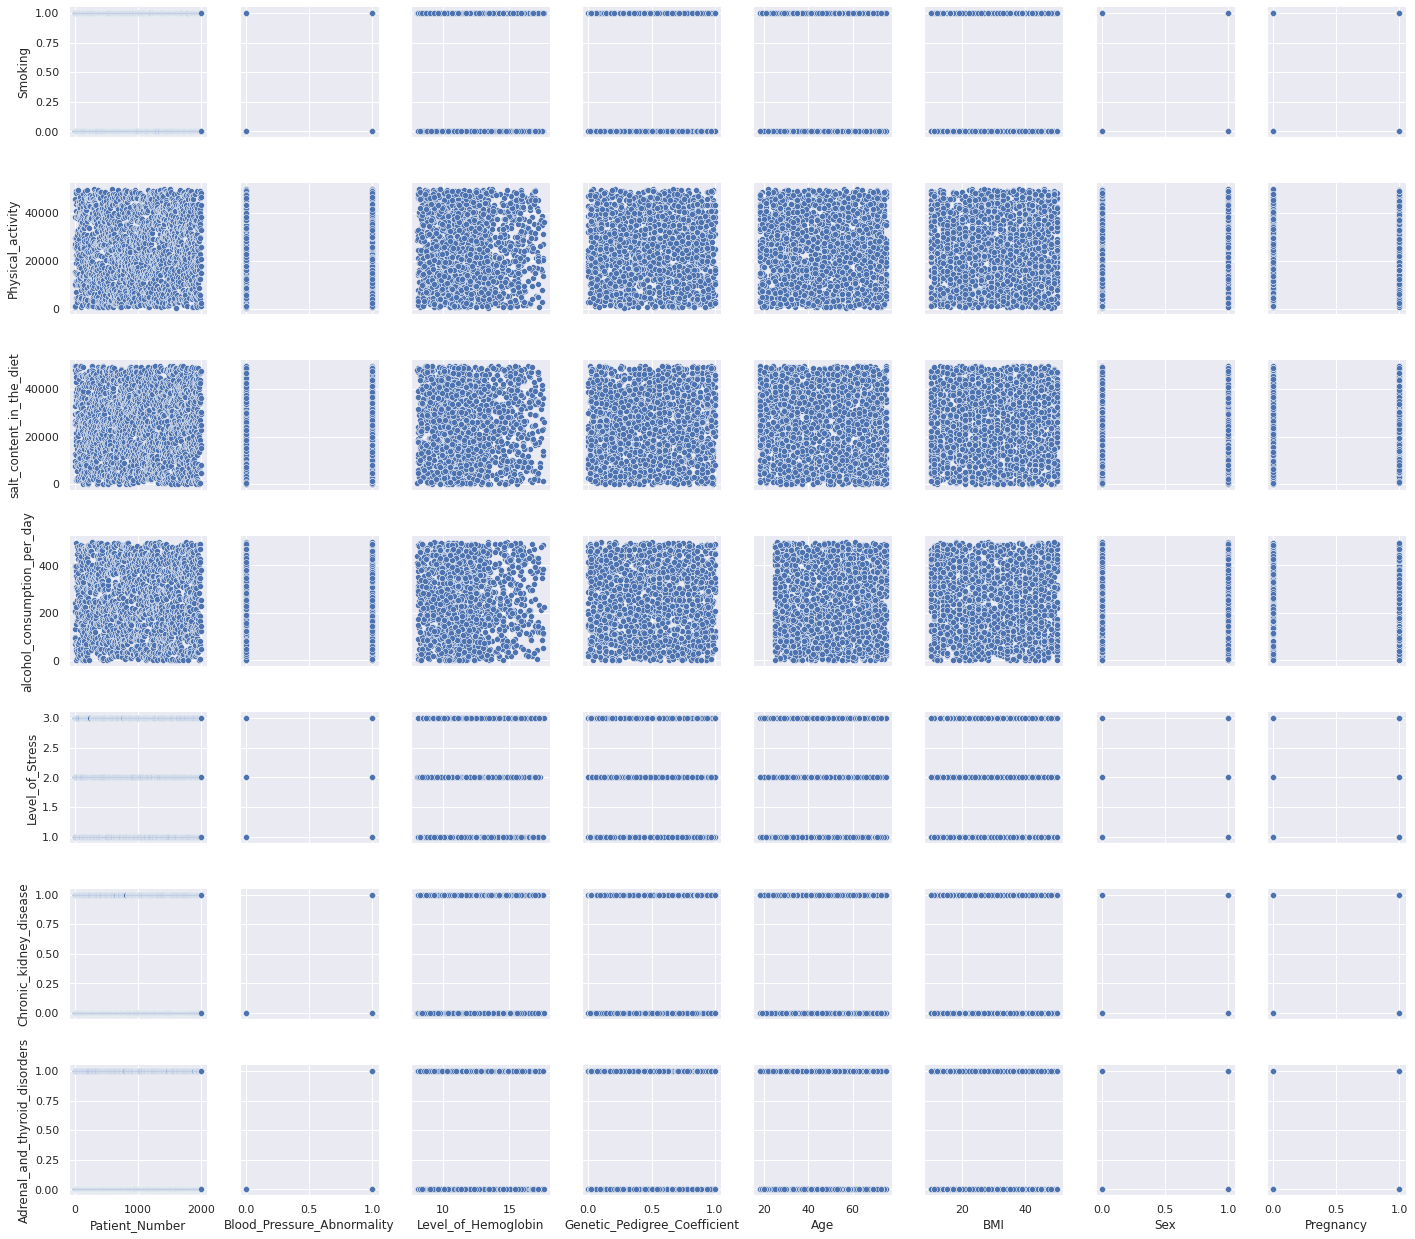

In [16]:
sns.pairplot(df, x_vars=df.columns[0:8], y_vars=df.columns[8:])

In [17]:
#function to identify data type
def type_columns(df,type_req):
    type_req_cols = df.select_dtypes(include =[type_req]).columns
    return(type_req_cols.to_list())

In [18]:
int_cols = type_columns(df,'int64')
int_cols

['Patient_Number',
 'Blood_Pressure_Abnormality',
 'Age',
 'BMI',
 'Sex',
 'Smoking',
 'Physical_activity',
 'salt_content_in_the_diet',
 'Level_of_Stress',
 'Chronic_kidney_disease',
 'Adrenal_and_thyroid_disorders']

In [19]:
float_cols = type_columns(df, 'float64')
float_cols

['Level_of_Hemoglobin',
 'Genetic_Pedigree_Coefficient',
 'Pregnancy',
 'alcohol_consumption_per_day']

In [20]:
int_cols =  [col for col in int_cols if col not in ['Patient_Number','Blood_Pressure_Abnormality','Sex','Smoking','Chronic_kidney_disease','Adrenal_and_thyroid_disorders','Level_of_Stress'] ]
int_cols

['Age', 'BMI', 'Physical_activity', 'salt_content_in_the_diet']

In [21]:
#Convert this list of features as float
float_cols.extend(int_cols)
float_cols

['Level_of_Hemoglobin',
 'Genetic_Pedigree_Coefficient',
 'Pregnancy',
 'alcohol_consumption_per_day',
 'Age',
 'BMI',
 'Physical_activity',
 'salt_content_in_the_diet']

In [22]:
float_cols.remove('Pregnancy')

In [23]:
#Convert this list of features as object
object_cols = [col for col in df.columns if (col not in float_cols and col not in int_cols)]
object_cols

['Patient_Number',
 'Blood_Pressure_Abnormality',
 'Sex',
 'Pregnancy',
 'Smoking',
 'Level_of_Stress',
 'Chronic_kidney_disease',
 'Adrenal_and_thyroid_disorders']

In [24]:
len(float_cols + object_cols), df.shape[1]

(15, 15)

In [25]:
rows_float_cols = int(np.ceil(len(float_cols)/3))
rows_float_cols

3

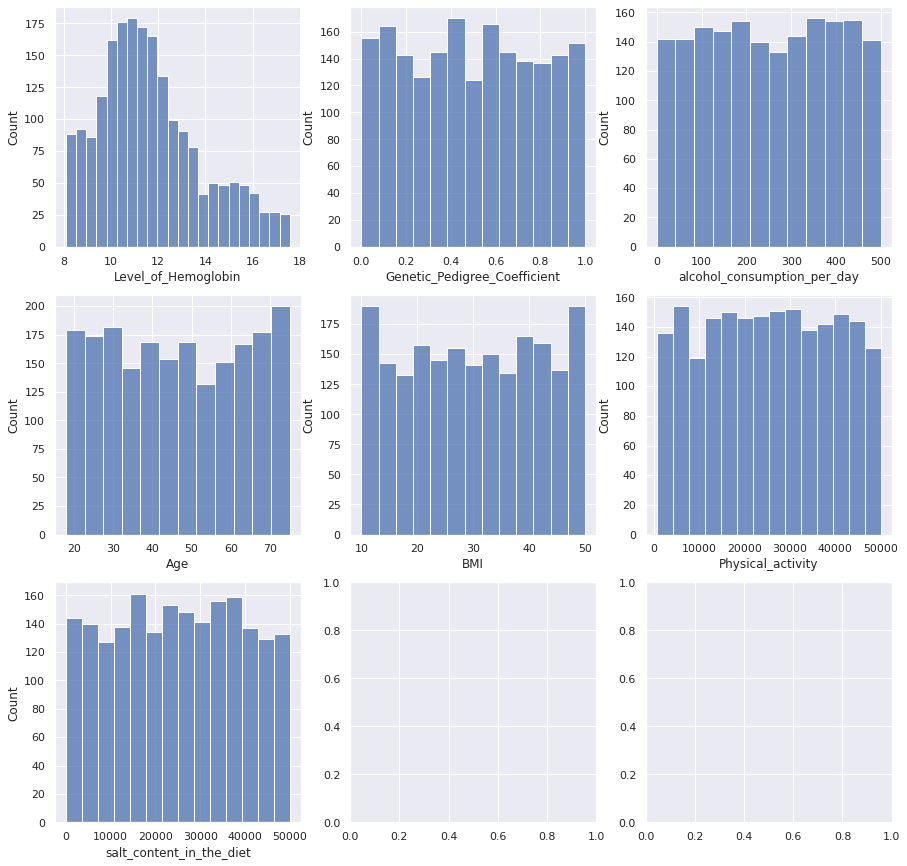

In [26]:
#let's get distribution plot of numeric features
f, axes = plt.subplots(rows_float_cols, 3,figsize=(15,15))
i = 1
for col in float_cols:
    plt.subplot(rows_float_cols,3,i)
    sns.histplot( data=df, x = col)
    i = i+1

Except Level_of_Hemoglobin, all the features have approximate uniform distribution.    
Level_of_Hemoglobin is positively skewed, flatter tail on the right.   
Log transformation may be applied

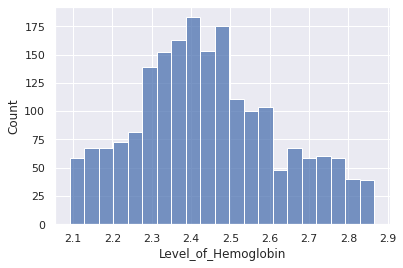

In [108]:
#Log transformation
sns.histplot(np.log(df['Level_of_Hemoglobin']))

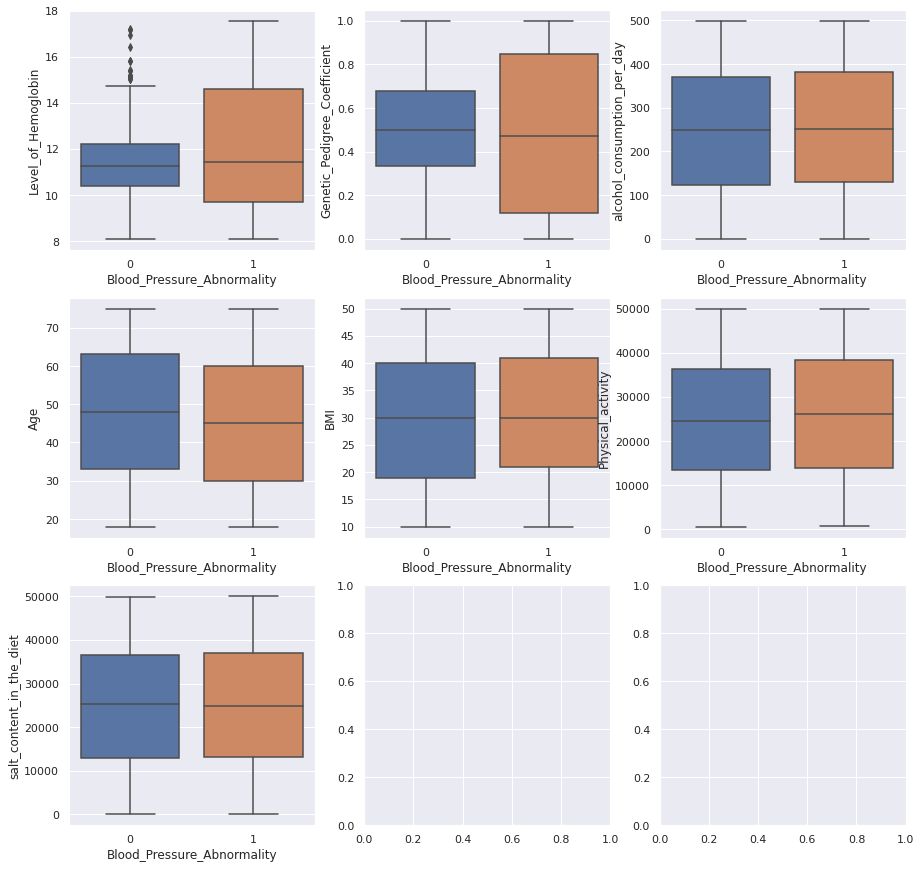

In [28]:
#let's get boxplots of variables against Blood_Pressure_Abnormality
f, axes = plt.subplots(rows_float_cols, 3,figsize=(15,15))
i = 1
for col in float_cols:
    plt.subplot(rows_float_cols,3,i)
    sns.boxplot(x='Blood_Pressure_Abnormality',y= col, data=df)
    i = i+1

Right skewed values in hemoglobin against '0 - Blood_Pressure_Abnormality' indicates some outliers



In [30]:
#Outlier Percentage
len(df[(df['Level_of_Hemoglobin'] >= 15) & (df['Blood_Pressure_Abnormality']==0)])/len(df[df['Blood_Pressure_Abnormality']==0])*100

1.2833168805528135

In [109]:
#Let's check correlation
df.corr().round(decimals=2)

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day
Patient_Number,1.00,0.02,-0.00,-0.01,-0.03,-0.00,0.02,0.02,-0.03
Blood_Pressure_Abnormality,0.02,1.00,0.14,-0.03,-0.07,0.04,0.04,0.01,0.02
Level_of_Hemoglobin,-0.00,0.14,1.00,-0.02,-0.18,0.12,-0.03,0.02,0.01
Genetic_Pedigree_Coefficient,-0.01,-0.03,-0.02,1.00,-0.02,-0.01,-0.01,0.04,-0.02
Age,-0.03,-0.07,-0.18,-0.02,1.00,0.03,0.03,-0.05,0.02
BMI,-0.00,0.04,0.12,-0.01,0.03,1.00,-0.00,0.03,-0.04
Physical_activity,0.02,0.04,-0.03,-0.01,0.03,-0.00,1.00,-0.03,-0.01
salt_content_in_the_diet,0.02,0.01,0.02,0.04,-0.05,0.03,-0.03,1.00,-0.03
alcohol_consumption_per_day,-0.03,0.02,0.01,-0.02,0.02,-0.04,-0.01,-0.03,1.00


No strong correlation is observed

In [32]:
# Explore if min, max, mean or median of given features are any different in null values in alcohol_consumption_per_day vs non-null values in alcohol_consumption_per_day
df[df['alcohol_consumption_per_day'].isnull()].agg(['min','max','mean','median']).T

,min,max,mean,median
Patient_Number,1.00,1998.00,975.958678,948.000
Blood_Pressure_Abnormality,0.00,1.00,0.603306,1.000
Level_of_Hemoglobin,8.19,17.44,12.329380,11.935
Genetic_Pedigree_Coefficient,0.00,1.00,0.508442,0.540
Age,18.00,34.00,20.938017,21.000
BMI,10.00,50.00,30.103306,30.000
Sex,0.00,1.00,0.425620,0.000
Pregnancy,0.00,1.00,0.475728,0.000
Smoking,0.00,1.00,0.491736,0.000
Physical_activity,745.00,49980.00,25352.214876,26733.500


In [33]:
df[df['alcohol_consumption_per_day']!=np.nan].agg(['min','max','mean','median']).T

,min,max,mean,median
Patient_Number,1.0,2000.00,1000.500000,1000.50
Blood_Pressure_Abnormality,0.0,1.00,0.493500,0.00
Level_of_Hemoglobin,8.1,17.56,11.710035,11.33
Genetic_Pedigree_Coefficient,0.0,1.00,0.494817,0.49
Age,18.0,75.00,46.558500,46.00
BMI,10.0,50.00,30.081500,30.00
Sex,0.0,1.00,0.496000,0.00
Pregnancy,0.0,1.00,0.450226,0.00
Smoking,0.0,1.00,0.509500,1.00
Physical_activity,628.0,49980.00,25254.424500,25353.00


No difference is observed in min, max, mean or median in given features against null values in alcohol_consumption_per_day and non-null values in alcohol_consumption_per_day

Data Preprocessing

In [34]:
object_cols.remove('Patient_Number')
object_cols.remove('Blood_Pressure_Abnormality')
object_cols

['Sex',
 'Pregnancy',
 'Smoking',
 'Level_of_Stress',
 'Chronic_kidney_disease',
 'Adrenal_and_thyroid_disorders']

In [35]:
float_cols

['Level_of_Hemoglobin',
 'Genetic_Pedigree_Coefficient',
 'alcohol_consumption_per_day',
 'Age',
 'BMI',
 'Physical_activity',
 'salt_content_in_the_diet']

In [36]:
#List of columns to be used in classification model
independent_cols = copy.deepcopy(float_cols)
independent_cols.extend(object_cols)
independent_cols

['Level_of_Hemoglobin',
 'Genetic_Pedigree_Coefficient',
 'alcohol_consumption_per_day',
 'Age',
 'BMI',
 'Physical_activity',
 'salt_content_in_the_diet',
 'Sex',
 'Pregnancy',
 'Smoking',
 'Level_of_Stress',
 'Chronic_kidney_disease',
 'Adrenal_and_thyroid_disorders']

In [37]:
#Target Variable
target_col = ['Blood_Pressure_Abnormality']
target_col

'Blood_Pressure_Abnormality'

In [38]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df[independent_cols], df[target_col], test_size=0.10, random_state=1)

In [39]:
X_train.head()

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,alcohol_consumption_per_day,Age,BMI,Physical_activity,salt_content_in_the_diet,Sex,Pregnancy,Smoking,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
541,9.95,0.58,367.0,66,45,44371,26053,1,NaN,1,3,0,0
1132,8.20,0.84,50.0,38,26,46850,22938,1,0.0,0,2,0,0
1582,9.14,0.86,61.0,68,28,22645,5141,1,NaN,1,3,0,0
1244,8.54,0.74,51.0,40,35,44253,6783,1,1.0,0,3,0,1
1947,10.56,0.17,445.0,30,12,28555,985,0,NaN,0,1,0,0


In [40]:
# Correct the data type
X_train[float_cols] = X_train[float_cols].astype('float')
X_train[object_cols] = X_train[object_cols].astype('object')

In [44]:
X_test[float_cols] = X_test[float_cols].astype('float')
X_test[object_cols] = X_test[object_cols].astype('object')

In [45]:
#Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_vif = copy.deepcopy(df[float_cols])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [46]:
df_vif.isnull().sum()

Level_of_Hemoglobin               0
Genetic_Pedigree_Coefficient     92
alcohol_consumption_per_day     242
Age                               0
BMI                               0
Physical_activity                 0
salt_content_in_the_diet          0
dtype: int64

In [47]:
sim_median = SimpleImputer(missing_values=np.nan, strategy='median')
sim_median.fit(df_vif)
df_vif = pd.DataFrame(sim_median.transform(df_vif))

In [48]:
df_vif.columns = float_cols
df_vif.head()

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,alcohol_consumption_per_day,Age,BMI,Physical_activity,salt_content_in_the_diet
0,11.28,0.90,250.0,34.0,23.0,45961.0,48071.0
1,9.75,0.23,205.0,54.0,33.0,26106.0,25333.0
2,10.79,0.91,67.0,70.0,49.0,9995.0,29465.0
3,11.00,0.43,242.0,71.0,50.0,10635.0,7439.0
4,14.17,0.83,397.0,52.0,19.0,15619.0,49644.0


In [49]:
df_vif = add_constant(df_vif)
pd.Series([variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])], index=df_vif.columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                           61.196107
Level_of_Hemoglobin              1.053290
Genetic_Pedigree_Coefficient     1.003055
alcohol_consumption_per_day      1.003176
Age                              1.041325
BMI                              1.019135
Physical_activity                1.002355
salt_content_in_the_diet         1.006029
dtype: float64

Missing value treatment

In [50]:
X_train['Pregnancy'].replace(np.nan, 0, inplace=True)

In [51]:
X_test['Pregnancy'].replace(np.nan, 0, inplace=True)

In [52]:
X_train.head()

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,alcohol_consumption_per_day,Age,BMI,Physical_activity,salt_content_in_the_diet,Sex,Pregnancy,Smoking,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
541,9.95,0.58,367.0,66.0,45.0,44371.0,26053.0,1,0.0,1,3,0,0
1132,8.20,0.84,50.0,38.0,26.0,46850.0,22938.0,1,0.0,0,2,0,0
1582,9.14,0.86,61.0,68.0,28.0,22645.0,5141.0,1,0.0,1,3,0,0
1244,8.54,0.74,51.0,40.0,35.0,44253.0,6783.0,1,1.0,0,3,0,1
1947,10.56,0.17,445.0,30.0,12.0,28555.0,985.0,0,0.0,0,1,0,0


In [53]:
#Simple Imputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

In [54]:
imp_median.fit(X_train)

SimpleImputer(strategy='median')

In [55]:
X_train = pd.DataFrame(imp_median.transform(X_train))

In [56]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,9.95,0.58,367.0,66.0,45.0,44371.0,26053.0,1.0,0.0,1.0,3.0,0.0,0.0
1,8.20,0.84,50.0,38.0,26.0,46850.0,22938.0,1.0,0.0,0.0,2.0,0.0,0.0
2,9.14,0.86,61.0,68.0,28.0,22645.0,5141.0,1.0,0.0,1.0,3.0,0.0,0.0
3,8.54,0.74,51.0,40.0,35.0,44253.0,6783.0,1.0,1.0,0.0,3.0,0.0,1.0
4,10.56,0.17,445.0,30.0,12.0,28555.0,985.0,0.0,0.0,0.0,1.0,0.0,0.0


In [57]:
X_train.columns = independent_cols

In [58]:
X_train.isnull().sum()

Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
alcohol_consumption_per_day      0
Age                              0
BMI                              0
Physical_activity                0
salt_content_in_the_diet         0
Sex                              0
Pregnancy                        0
Smoking                          0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

Transform Test data

In [59]:
X_test = pd.DataFrame(imp_median.transform(X_test))

In [60]:
X_test.columns = independent_cols

In [61]:
X_test.isnull().sum()

Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
alcohol_consumption_per_day      0
Age                              0
BMI                              0
Physical_activity                0
salt_content_in_the_diet         0
Sex                              0
Pregnancy                        0
Smoking                          0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

Logarithmmic transformation on Level_of_Hemoglobin ?

Standard Scaler

In [62]:
scaler = StandardScaler()
scaler.fit(X_train[float_cols])

StandardScaler()

In [63]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train[float_cols]), columns=float_cols)

In [64]:
X_train_scaled.head()

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,alcohol_consumption_per_day,Age,BMI,Physical_activity,salt_content_in_the_diet
0,-0.814600,0.284941,0.852470,1.146675,1.261035,1.353104,0.075327
1,-1.610386,1.202335,-1.493890,-0.496602,-0.353377,1.529795,-0.143971
2,-1.182935,1.272904,-1.412471,1.264051,-0.183439,-0.195421,-1.396893
3,-1.455776,0.849491,-1.486488,-0.379225,0.411345,1.344694,-1.281295
4,-0.537211,-1.161719,1.429807,-0.966110,-1.542943,0.225815,-1.689479


In [65]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test[float_cols]), columns=float_cols)

In [66]:
#X_std = pd.merge(X_numeric_std, X[categorical], left_index=True, right_index=True)

One hot encoding

In [67]:
one_hot_cols = copy.deepcopy(object_cols)
one_hot_cols

['Sex',
 'Pregnancy',
 'Smoking',
 'Level_of_Stress',
 'Chronic_kidney_disease',
 'Adrenal_and_thyroid_disorders']

In [68]:
one_hot_cols.remove('Level_of_Stress')
one_hot_cols

['Sex',
 'Pregnancy',
 'Smoking',
 'Chronic_kidney_disease',
 'Adrenal_and_thyroid_disorders']

In [69]:
ordinal_col = ['Level_of_Stress']
ordinal_col

['Level_of_Stress']

In [70]:
df_train_ohc = copy.deepcopy(X_train[object_cols])
df_test_ohc = copy.deepcopy(X_test[object_cols])

In [71]:
for i in one_hot_cols:
    s = pd.get_dummies(df_train_ohc[one_hot_cols][i],prefix=i,drop_first = True)         # get dummies for the categorical variables and concat to X
    df_train_ohc = pd.concat([df_train_ohc,s], axis = 1)
    t = pd.get_dummies(df_test_ohc[i],prefix=i,drop_first = True)         # get dummies for the categorical variables and concat to X
    df_test_ohc = pd.concat([df_test_ohc,t], axis = 1)

In [72]:
df_train_ohc.drop(one_hot_cols, inplace=True, axis = 1)

In [73]:
df_test_ohc.drop(one_hot_cols, inplace=True, axis = 1)

In [74]:
df_train_ohc.head()

,Level_of_Stress,Sex_1.0,Pregnancy_1.0,Smoking_1.0,Chronic_kidney_disease_1.0,Adrenal_and_thyroid_disorders_1.0
0,3.0,1,0,1,0,0
1,2.0,1,0,0,0,0
2,3.0,1,0,1,0,0
3,3.0,1,1,0,0,1
4,1.0,0,0,0,0,0


In [75]:
X_train_scaled_ohc = pd.merge(X_train_scaled, df_train_ohc, left_index=True, right_index=True)
X_test_scaled_ohc = pd.merge(X_test_scaled, df_test_ohc, left_index=True, right_index=True)

In [76]:
X_train_scaled_ohc.head()

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,alcohol_consumption_per_day,Age,BMI,Physical_activity,salt_content_in_the_diet,Level_of_Stress,Sex_1.0,Pregnancy_1.0,Smoking_1.0,Chronic_kidney_disease_1.0,Adrenal_and_thyroid_disorders_1.0
0,-0.814600,0.284941,0.852470,1.146675,1.261035,1.353104,0.075327,3.0,1,0,1,0,0
1,-1.610386,1.202335,-1.493890,-0.496602,-0.353377,1.529795,-0.143971,2.0,1,0,0,0,0
2,-1.182935,1.272904,-1.412471,1.264051,-0.183439,-0.195421,-1.396893,3.0,1,0,1,0,0
3,-1.455776,0.849491,-1.486488,-0.379225,0.411345,1.344694,-1.281295,3.0,1,1,0,0,1
4,-0.537211,-1.161719,1.429807,-0.966110,-1.542943,0.225815,-1.689479,1.0,0,0,0,0,0


In [77]:
X_test_scaled_ohc.head()

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,alcohol_consumption_per_day,Age,BMI,Physical_activity,salt_content_in_the_diet,Level_of_Stress,Sex_1.0,Pregnancy_1.0,Smoking_1.0,Chronic_kidney_disease_1.0,Adrenal_and_thyroid_disorders_1.0
0,-0.182518,0.920060,1.237361,-0.320537,-0.693253,-1.577733,0.421347,3.0,1,0,1,0,0
1,-1.478513,0.390794,0.970898,1.440117,0.496314,0.979622,1.077623,2.0,1,0,0,0,1
2,-1.187483,-1.479278,1.044915,-0.320537,-0.778222,-0.576174,0.791373,1.0,1,0,1,1,0
3,-0.723653,0.390794,-1.168212,1.498805,0.581283,-0.075822,0.826855,2.0,1,0,1,0,0
4,0.390448,0.002666,1.259567,-0.437914,-1.203067,-0.661348,-0.393049,3.0,0,0,1,1,1


In [78]:
X_test_scaled_ohc.dtypes

Level_of_Hemoglobin                  float64
Genetic_Pedigree_Coefficient         float64
alcohol_consumption_per_day          float64
Age                                  float64
BMI                                  float64
Physical_activity                    float64
salt_content_in_the_diet             float64
Level_of_Stress                      float64
Sex_1.0                                uint8
Pregnancy_1.0                          uint8
Smoking_1.0                            uint8
Chronic_kidney_disease_1.0             uint8
Adrenal_and_thyroid_disorders_1.0      uint8
dtype: object

In [79]:
X_train_scaled_ohc[ordinal_col] = X_train_scaled_ohc[ordinal_col].astype('int')

In [80]:
X_train_scaled_ohc.head()

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,alcohol_consumption_per_day,Age,BMI,Physical_activity,salt_content_in_the_diet,Level_of_Stress,Sex_1.0,Pregnancy_1.0,Smoking_1.0,Chronic_kidney_disease_1.0,Adrenal_and_thyroid_disorders_1.0
0,-0.814600,0.284941,0.852470,1.146675,1.261035,1.353104,0.075327,3,1,0,1,0,0
1,-1.610386,1.202335,-1.493890,-0.496602,-0.353377,1.529795,-0.143971,2,1,0,0,0,0
2,-1.182935,1.272904,-1.412471,1.264051,-0.183439,-0.195421,-1.396893,3,1,0,1,0,0
3,-1.455776,0.849491,-1.486488,-0.379225,0.411345,1.344694,-1.281295,3,1,1,0,0,1
4,-0.537211,-1.161719,1.429807,-0.966110,-1.542943,0.225815,-1.689479,1,0,0,0,0,0


In [81]:
X_test_scaled_ohc[ordinal_col] = X_test_scaled_ohc[ordinal_col].astype('int')

In [82]:
X_test_scaled_ohc.head()

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,alcohol_consumption_per_day,Age,BMI,Physical_activity,salt_content_in_the_diet,Level_of_Stress,Sex_1.0,Pregnancy_1.0,Smoking_1.0,Chronic_kidney_disease_1.0,Adrenal_and_thyroid_disorders_1.0
0,-0.182518,0.920060,1.237361,-0.320537,-0.693253,-1.577733,0.421347,3,1,0,1,0,0
1,-1.478513,0.390794,0.970898,1.440117,0.496314,0.979622,1.077623,2,1,0,0,0,1
2,-1.187483,-1.479278,1.044915,-0.320537,-0.778222,-0.576174,0.791373,1,1,0,1,1,0
3,-0.723653,0.390794,-1.168212,1.498805,0.581283,-0.075822,0.826855,2,1,0,1,0,0
4,0.390448,0.002666,1.259567,-0.437914,-1.203067,-0.661348,-0.393049,3,0,0,1,1,1


In [83]:
# Fit the model on training data
logit_model = LogisticRegression(solver="liblinear", random_state=123)
logit_model.fit(X_train_scaled_ohc, y_train)

#predict on test data
y_test_predict = logit_model.predict(X_test_scaled_ohc)

In [84]:
print(logit_model.score(X_train_scaled_ohc, y_train))

0.9466666666666667


In [85]:
logit_model.score(X_test_scaled_ohc, y_test)

0.97

In [86]:
#finding out probabilities from the same model
predict_probabilities = logit_model.predict_proba(X_test_scaled_ohc)
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict)
auc_score = roc_auc_score(y_test, y_test_predict)
print(auc_score)

0.9690721649484536


In [87]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

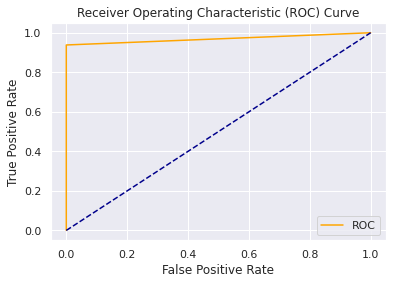

In [88]:
plot_roc_curve(fpr, tpr)

**Pipeline**

In [89]:
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(df[independent_cols], df[target_col], test_size=0.10, random_state=1)

In [90]:
X_train_pipe[float_cols] = X_train_pipe[float_cols].astype('float')
X_train_pipe[object_cols] = X_train_pipe[object_cols].astype('object')
X_test_pipe[float_cols] = X_test_pipe[float_cols].astype('float')
X_test_pipe[object_cols] = X_test_pipe[object_cols].astype('object')

In [91]:
X_train_pipe['Level_of_Stress'] = X_train_pipe['Level_of_Stress'].astype('int').astype('object')
X_test_pipe['Level_of_Stress'] = X_test_pipe['Level_of_Stress'].astype('int').astype('object')

In [92]:
log_transformer_cols = ['Level_of_Hemoglobin']
log_transformer_cols

['Level_of_Hemoglobin']

In [93]:
#Function for log transformation
def log_transform(x):
  return np.log(x + 1)

In [94]:
LogTransformer = FunctionTransformer(log_transform)

In [95]:
numerical_cols = copy.deepcopy(float_cols)
cat_nominal_cols = copy.deepcopy(object_cols)
numerical_cols

['Level_of_Hemoglobin',
 'Genetic_Pedigree_Coefficient',
 'alcohol_consumption_per_day',
 'Age',
 'BMI',
 'Physical_activity',
 'salt_content_in_the_diet']

In [96]:
cat_nominal_cols.remove('Level_of_Stress')
cat_nominal_cols

['Sex',
 'Pregnancy',
 'Smoking',
 'Chronic_kidney_disease',
 'Adrenal_and_thyroid_disorders']

In [97]:
cat_ordinal_cols = ['Level_of_Stress']
cat_ordinal_cols

['Level_of_Stress']

In [98]:
# Preprocessing for skewed data
log_transformer = Pipeline(steps=[
                                  ('log', LogTransformer)])

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
                                        ('imputer', SimpleImputer(strategy='median')),
                                        ('standardscaler', StandardScaler())
                                        ])

# Preprocessing for categorical data
cat_nominal_transformer = Pipeline(steps=[
                                          ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))
                                          ])

cat_ordinal_transformer = Pipeline(steps=[
                                          ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                          ('ordinal', OrdinalEncoder())
                                          ])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
                  ('log', log_transformer, log_transformer_cols),
                  ('num', numerical_transformer, numerical_cols),
                  ('cat_nom', cat_nominal_transformer, cat_nominal_cols),
                  ('cat_ord', cat_ordinal_transformer, cat_ordinal_cols)
                  ])

In [99]:
model = LogisticRegression(solver="liblinear", random_state=123)

In [100]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                              ] )

In [101]:
my_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<function log_transform at 0x7f1f6eea4710>))]),
                                                  ['Level_of_Hemoglobin']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Level_of_Hemoglobin',
                                                   'Genetic_Pedigree_Coefficient',
                                                   'a

In [102]:
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train_pipe , y_train_pipe)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<function log_transform at 0x7f1f6eea4710>))]),
                                                  ['Level_of_Hemoglobin']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Level_of_Hemoglobin',
                                                   'Genetic_Pedigree_Coefficient',
                                                   'a

Saving the model

In [103]:
#dump the pipeline to pickle file
import pickle
filename = 'Classify_Abnormal_BP_Pipeline.pkl'
pickle.dump(my_pipeline, open(filename, 'wb'))

In [110]:
#from google.colab import files
#files.download('Classify_Abnormal_BP_Pipeline.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Load Model Pipeline

In [104]:
filename = 'Classify_Abnormal_BP_Pipeline.pkl'
Classify_Abnormal_BP_Pipeline = pickle.load(open(filename, 'rb'))

In [105]:
pipe_preds = Classify_Abnormal_BP_Pipeline.predict(X_test_pipe)

AUC-ROC Score

In [106]:
#auc_score = roc_auc_score(y_test_pipe , pipe_preds)
auc_score

0.9690721649484536

F1-Score, Precision, Recall

In [107]:
print(classification_report(y_test_pipe , pipe_preds,labels=[1, 0]))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        97
           0       0.94      1.00      0.97       103

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



In [111]:
import lightgbm as lgb

In [122]:
pip install GPyOpt #bayes_opt

     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 959 kB 39.5 MB/s 
     |████████████████████████████████| 71 kB 4.4 MB/s 
  Created wheel for GPyOpt: filename=GPyOpt-1.2.6-py3-none-any.whl size=83609 sha256=603c59c2b9406ba7185259c4fc05c0fcff35a3a5b4d169024060acea21083c73
  Stored in directory: /root/.cache/pip/wheels/e6/fa/d1/f9652b5af79f769a0ab74dbead7c7aea9a93c6bc74543fd3ec
  Created wheel for GPy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565087 sha256=0ca202e7579eb62065af39b6926dd56c4031fc8e0df52837249503cfdc0031b9
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=baed6fd0d5c2a0d10bdfb2b10c1f8f22b0ca51e36593cb705586110c2dd6e0a6
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPyOpt GPy paramz


In [115]:
#for encoded version
df_train_lgb = copy.deepcopy(X_train_scaled_ohc)
y_train_lgb = np.array(y_train)
df_test_lgb = copy.deepcopy(X_test_scaled_ohc)
y_test_lgb = np.array(y_test)
random_seed = 12345

train_data = lgb.Dataset(data = df_train_lgb, label = y_train_lgb)

def lgb_eval(num_iterations,num_leaves, feature_fraction, bagging_fraction, max_depth, lambda_l1, lambda_l2, min_split_gain, min_child_weight,learning_rate,min_data_in_leaf,bagging_freq):
    params = {'application':'binary', 'learning_rate':0.01, 'early_stopping_round':100, 'metric':'auc'} #f_roc_auc for roc_auc
    params['num_iterations'] = int(num_iterations)
    params["num_leaves"] = int(round(num_leaves))
    params['feature_fraction'] = max(min(feature_fraction, 1), 0)
    params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
    params['max_depth'] = int(round(max_depth))
    params['lambda_l1'] = max(lambda_l1, 0)
    params['lambda_l2'] = max(lambda_l2, 0)
    params['min_split_gain'] = min_split_gain
    params['min_child_weight'] = min_child_weight
    params['learning_rate'] = learning_rate
    params['min_data_in_leaf'] = int(round(min_data_in_leaf))
    params['bagging_freq'] = int(round(bagging_freq))
    cv_result = lgb.cv(params, train_data, nfold=10, seed=random_seed, stratified=True, verbose_eval =200, metrics = ['auc']) #feval = f_roc_auc for roc_auc isntead of metrics = ['auc']
    return max(cv_result['auc-mean'])

In [123]:
import GPyOpt

from GPyOpt.methods import BayesianOptimization

In [127]:
lgbBO = BayesianOptimization(lgb_eval, {'num_iterations': (10,5000),
                                        'num_leaves': (24, 45),
                                        'feature_fraction': (0.1, 0.9),
                                        'bagging_fraction': (0.8, 1),
                                        'max_depth': (5, 8.99),
                                        'lambda_l1': (0, 5),
                                        'lambda_l2': (0, 3),
                                        'min_split_gain': (0.001, 0.1),
                                        'min_child_weight': (5, 50), 
                                        'learning_rate' : (0,1),
                                        'min_data_in_leaf' : (50,200),
                                        'bagging_freq' : (1,10)}, random_state=0)

AttributeError: ignored